In [1]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#get only jobs in Thailand
df_TH = df[df['job_country'] == 'Thailand']
df_skills = df_TH.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1590,Data Analyst,Data Analytic Translator,"Bangkok, Thailand",via Jobbkk.com,Full-time,False,Thailand,2023-08-13 13:16:06,True,False,Thailand,None,NaN,NaN,บริษัท โอสถสภา จำกัด (มหาชน),None,None
1972,Data Analyst,Data Analyst Internship,Thailand,via LinkedIn,Full-time,False,Thailand,2023-04-15 13:14:39,False,False,Thailand,None,NaN,NaN,Prinsiri,bigquery,"{'cloud': ['bigquery'], 'libraries': ['seleniu..."
1972,Data Analyst,Data Analyst Internship,Thailand,via LinkedIn,Full-time,False,Thailand,2023-04-15 13:14:39,False,False,Thailand,None,NaN,NaN,Prinsiri,selenium,"{'cloud': ['bigquery'], 'libraries': ['seleniu..."
2273,Data Scientist,Data Scientist,"Bangkok, Thailand",via LinkedIn,Full-time,False,Thailand,2023-06-22 13:10:46,False,False,Thailand,None,NaN,NaN,Unison Consulting,python,"{'analyst_tools': ['tableau', 'power bi'], 'li..."
2273,Data Scientist,Data Scientist,"Bangkok, Thailand",via LinkedIn,Full-time,False,Thailand,2023-06-22 13:10:46,False,False,Thailand,None,NaN,NaN,Unison Consulting,r,"{'analyst_tools': ['tableau', 'power bi'], 'li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785640,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.",spreadsheet,"{'analyst_tools': ['excel', 'spreadsheet'], 'l..."
785713,Cloud Engineer,"Data Center Chief Engineer, AWS Infrastructure...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),None,None
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),excel,"{'analyst_tools': ['excel', 'word', 'outlook']}"
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),word,"{'analyst_tools': ['excel', 'word', 'outlook']}"


In [2]:
#counts skills per job title and sort values
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
698,sql,Data Analyst,457
699,sql,Data Engineer,369
180,excel,Data Analyst,343
510,power bi,Data Analyst,315
544,python,Data Engineer,308
...,...,...,...
684,spreadsheet,Data Scientist,1
156,django,Machine Learning Engineer,1
686,spring,Business Analyst,1
687,spring,Data Scientist,1


In [3]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3]) # Select only first 3 job titles
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

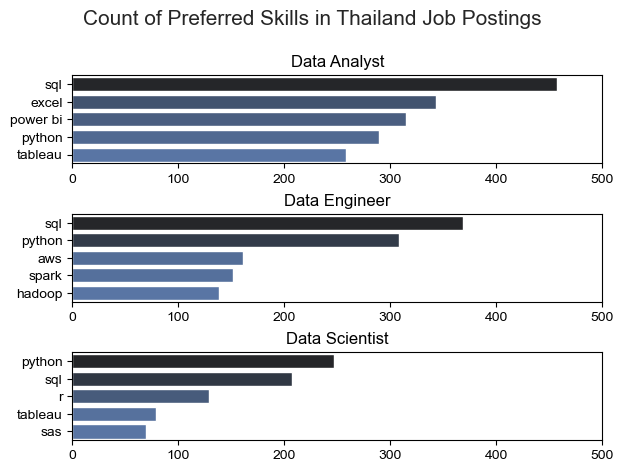

In [4]:
#plot horizontal barplot
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 500)

fig.suptitle('Count of Preferred Skills in Thailand Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [5]:
#covert counts to percentage
df_jobs_count = df_TH['job_title_short'].value_counts().reset_index(name='jobs_total')
df_jobs_count

,job_title_short,jobs_total
0,Data Analyst,1477
1,Data Engineer,715
2,Business Analyst,543
3,Data Scientist,503
4,Software Engineer,340
5,Senior Data Analyst,162
6,Cloud Engineer,140
7,Machine Learning Engineer,99
8,Senior Data Scientist,96
9,Senior Data Engineer,86


In [6]:
df_perc = pd.merge(df_skills_count, df_jobs_count, on='job_title_short', how='left')
df_perc['skill_percent'] = (df_perc['skill_count'] / df_perc['jobs_total']) * 100
df_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,457,1477,30.941097
1,sql,Data Engineer,369,715,51.608392
2,excel,Data Analyst,343,1477,23.222749
3,power bi,Data Analyst,315,1477,21.327014
4,python,Data Engineer,308,715,43.076923
...,...,...,...,...,...
828,spreadsheet,Data Scientist,1,503,0.198807
829,django,Machine Learning Engineer,1,99,1.010101
830,spring,Business Analyst,1,543,0.184162
831,spring,Data Scientist,1,503,0.198807


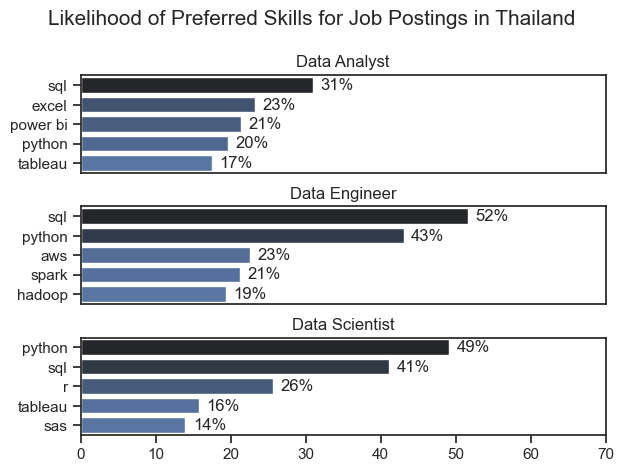

In [7]:
#plot skills perc
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_perc[df_perc['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)

#remove x_axis ticks for readability
    if i != (len(job_titles) - 1):
        ax[i].set_xticks([])

#label percentages on bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Preferred Skills for Job Postings in Thailand', fontsize=15)
fig.tight_layout(h_pad=0.8)
plt.show()